Day 99: Fatal Force Analysis (Data Viz)

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [599]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [600]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [601]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [602]:
print('Household income shape:', df_hh_income.shape)
print('Poverty share shape:', df_pct_poverty.shape)
print('High school graduation shape:', df_pct_completed_hs.shape)
print('Racial distribution shape:', df_share_race_city.shape)
print('Fatalities shape:', df_fatalities.shape)

Household income shape: (29322, 3)
Poverty share shape: (29329, 3)
High school graduation shape: (29329, 3)
Racial distribution shape: (29268, 7)
Fatalities shape: (2535, 14)


In [603]:
print('Household income columns:', df_hh_income.columns)
print('Poverty share columns:', df_pct_poverty.columns)
print('High school graduation columns:', df_pct_completed_hs.columns)
print('Racial distribution columns:', df_share_race_city.columns)
print('Fatalities columns:', df_fatalities.columns)

Household income columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Poverty share columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
High school graduation columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Racial distribution columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Fatalities columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [604]:
print('Household income NA values:', df_hh_income.isna().sum())
print('\nPoverty share NA values:', df_pct_poverty.isna().sum())
print('\nHigh school graduation NA values:', df_pct_completed_hs.isna().sum())
print('\nRacial distribution NA values:', df_share_race_city.isna().sum())
print('\nFatalities NA values:', df_fatalities.isna().sum())

Household income NA values: Geographic Area     0
City                0
Median Income      51
dtype: int64

Poverty share NA values: Geographic Area    0
City               0
poverty_rate       0
dtype: int64

High school graduation NA values: Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Racial distribution NA values: Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Fatalities NA values: id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_

In [605]:
print('Household income duplicates:', df_hh_income.duplicated().sum())
print('Poverty share duplicates:', df_pct_poverty.duplicated().sum())
print('High school graduation duplicates:', df_pct_completed_hs.duplicated().sum())
print('Racial distribution duplicates:', df_share_race_city.duplicated().sum())
print('Fatalities duplicates:', df_fatalities.duplicated().sum())

Household income duplicates: 0
Poverty share duplicates: 0
High school graduation duplicates: 0
Racial distribution duplicates: 0
Fatalities duplicates: 0


# Merge Datasets

In [606]:
df_demographics = df_pct_poverty.merge(df_hh_income, how='outer', on=['City', 'Geographic Area'])
df_demographics = df_demographics.merge(df_share_race_city, how='outer', left_on=['City', 'Geographic Area'], right_on=['City', 'Geographic area'])
df_demographics = df_demographics.merge(df_pct_completed_hs, how='outer', on=['City', 'Geographic Area'])

len1, len2, len3, len4, len5 = len(df_pct_poverty), len(df_hh_income), len(df_share_race_city), len(df_pct_completed_hs), len(df_demographics)
print('Length of dataframes before merges:', len1, len2, len3, len4)
print('Length of dataframe after merges:', len5)

Length of dataframes before merges: 29329 29322 29268 29329
Length of dataframe after merges: 29477


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [607]:
# Not sure why the City column is like that
df_demographics.head(10)

,Geographic Area,City,poverty_rate,Median Income,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs
0,AL,Abanda CDP,78.8,11207,AL,67.2,30.2,0,0,1.6,21.2
1,AL,Abbeville city,29.1,25615,AL,54.4,41.4,0.1,1,3.1,69.1
2,AL,Adamsville city,25.5,42575,AL,52.3,44.9,0.5,0.3,2.3,78.9
3,AL,Addison town,30.7,37083,AL,99.1,0.1,0,0.1,0.4,81.4
4,AL,Akron town,42,21667,AL,13.2,86.5,0,0,0.3,68.6
5,AL,Alabaster city,11.2,71816,AL,79.4,13.5,0.4,0.9,9,89.3
6,AL,Albertville city,26.7,32911,AL,75.9,1.9,0.8,0.5,27.9,72.7
7,AL,Alexander City city,30.4,29874,AL,62.2,32,0.2,0.9,4.8,78.1
8,AL,Alexandria CDP,9.7,56058,AL,87.4,10.2,0.3,0.5,0.9,88.8
9,AL,Aliceville city,41.3,21131,AL,22.6,74.9,0.1,0,1.2,74.3


In [608]:
# Add 'city' to Carson City so name is preserved in next step
for idx, row in df_demographics.iterrows():
    if row['City'] == 'Carson City':
        row['City'] = 'Carson City drop_this_string'

# Clean City column
#   Note: There are edge cases in the column that still need to be cleaned; however, I ignore these since they are dropped after the merge
trimmed_city = [' '.join(city.split(' ')[:-1]) for city in df_demographics['City']]
df_demographics['Trimmed City'] = trimmed_city
df_demographics.head()

,Geographic Area,City,poverty_rate,Median Income,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs,Trimmed City
0,AL,Abanda CDP,78.8,11207,AL,67.2,30.2,0,0,1.6,21.2,Abanda
1,AL,Abbeville city,29.1,25615,AL,54.4,41.4,0.1,1,3.1,69.1,Abbeville
2,AL,Adamsville city,25.5,42575,AL,52.3,44.9,0.5,0.3,2.3,78.9,Adamsville
3,AL,Addison town,30.7,37083,AL,99.1,0.1,0,0.1,0.4,81.4,Addison
4,AL,Akron town,42,21667,AL,13.2,86.5,0,0,0.3,68.6,Akron


In [609]:
# Merge fatalities and income datasets
df = df_fatalities.merge(df_demographics, how='left', left_on=['city', 'state'], right_on=['Trimmed City', 'Geographic Area'], )
df = df.drop(columns=['id', 'Geographic Area', 'Geographic area', 'City', 'Trimmed City'])
df = df.rename(columns={'Median Income': 'median_income'})

In [610]:
for col in df.columns:
    print(col, (df[col].isna().sum()))

name 0
date 0
manner_of_death 0
armed 9
age 78
gender 0
race 196
city 0
state 0
signs_of_mental_illness 0
threat_level 0
flee 65
body_camera 0
poverty_rate 289
median_income 303
share_white 291
share_black 291
share_native_american 291
share_asian 291
share_hispanic 291
percent_completed_hs 289


In [611]:
# Convert column of strings (with NaN and '(X)' values) to integers.
income_str_list = df['median_income']
income_list = []
for income in income_str_list:
    try:
        income_int = int(income)
    except ValueError:
        income_int = np.nan
    income_list.append(income_int)

# Impute missing values with median income
df['median_income'] = income_list
median_income = df['median_income'].median()
df['median_income'] = df['median_income'].fillna(median_income)

In [612]:
# Cast string columns as floats
df['poverty_rate'] = [float(i) for i in df['poverty_rate']]
df['share_white'] = [float(i) for i in df['share_white']]
df['share_black'] = [float(i) for i in df['share_black']]
df['share_native_american'] = [float(i) for i in df['share_native_american']]
df['share_asian'] = [float(i) for i in df['share_asian']]
df['share_hispanic'] = [float(i) for i in df['share_hispanic']]
df['percent_completed_hs'] = [float(i) for i in df['percent_completed_hs']]

# While at it, fill NaN in continuous variables with median value
df['age'] = df['age'].fillna(df['age'].median())
df['poverty_rate'] = df['poverty_rate'].fillna(df['poverty_rate'].median())
df['share_white'] = df['share_white'].fillna(df['share_white'].median())
df['share_black'] = df['share_black'].fillna(df['share_black'].median())
df['share_native_american'] = df['share_native_american'].fillna(df['share_native_american'].median())
df['share_asian'] = df['share_asian'].fillna(df['share_asian'].median())
df['share_hispanic'] = df['share_hispanic'].fillna(df['share_hispanic'].median())
df['percent_completed_hs'] = df['percent_completed_hs'].fillna(df['percent_completed_hs'].median())

In [613]:
# Drop all remaining NaN values in categorical columns
df = df.dropna()
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,flee,body_camera,poverty_rate,median_income,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs
0,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,...,Not fleeing,False,28.60,"37,072.00",78.90,0.80,3.70,1.10,19.20,80.10
1,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,...,Not fleeing,False,14.90,"65,765.00",70.90,2.60,1.00,8.90,21.10,88.10
2,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,...,Not fleeing,False,17.30,"45,947.00",71.90,11.50,1.20,4.80,15.30,87.50
3,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,...,Not fleeing,False,13.20,"81,294.00",48.50,6.10,0.50,33.30,15.10,87.00
4,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,...,Not fleeing,False,16.60,"47,791.00",76.50,0.90,1.20,0.90,43.10,76.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,...,Car,False,35.50,"27,683.00",51.70,42.90,0.30,0.90,3.00,82.10
2532,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,...,Car,False,40.00,"27,050.00",33.00,64.30,0.10,0.80,1.40,79.00
2535,Alejandro Alvarado,27/07/17,shot,knife,34.00,M,H,Chowchilla,CA,False,...,Not fleeing,False,32.10,"34,559.00",61.60,12.60,2.00,2.10,37.80,68.30
2540,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,...,Car,True,17.90,"42,650.00",90.50,3.10,0.80,3.20,2.70,89.30


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

#### NOTE: The data is not appropriate for calculating state-level poverty rates. We just have city-level data without a population variable; therefore, New York City, NY is given equal weight as New York Mills, NY. Instead, we should adjust for population to get a person-level measure aggreated to the state level. This problem persists for all of such state-level questions below

In [614]:
# Clean data for entire dataset (was not necessary previously when merge removed cities with missing data)
rate_list = []
for rate in df_pct_poverty['poverty_rate']:
    rate = rate.replace('-', '')
    if rate == '':
        rate = np.nan
    else:
        rate = float(rate)
    rate_list.append(rate)
df_pct_poverty['poverty_rate'] = rate_list

In [615]:
# Group poverty rates by state, return only top and bottom 5
df_pct_poverty_state = df_pct_poverty.groupby('Geographic Area').mean()
df_pct_poverty_state = df_pct_poverty_state.sort_values(by='poverty_rate', ascending=False)
df_pct_poverty_state = pd.concat([df_pct_poverty_state.head(5), df_pct_poverty_state.tail(5)])

<BarContainer object of 10 artists>

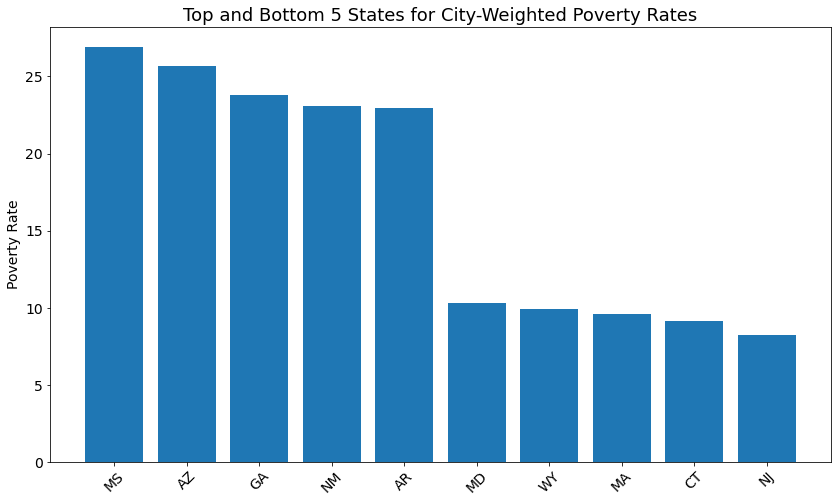

In [616]:
plt.figure(figsize=(14,8))
plt.title('Top and Bottom 5 States for City-Weighted Poverty Rates', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Poverty Rate', fontsize=14)

plt.bar(df_pct_poverty_state['poverty_rate'].index, df_pct_poverty_state['poverty_rate'].values)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [617]:
# Clean data for entire dataset (was not necessary previously when merge removed cities with missing data)
hs_list = []
for hs in df_pct_completed_hs['percent_completed_hs']:
    hs = hs.replace('-', '')
    if hs == '':
        hs = np.nan
    else:
        hs = float(hs)
    hs_list.append(hs)
df_pct_completed_hs['percent_completed_hs'] = hs_list

In [618]:
# Group poverty rates by state, return only top and bottom 5
df_pct_completed_hs_state = df_pct_completed_hs.groupby('Geographic Area').mean()
df_pct_completed_hs_state = df_pct_completed_hs_state.sort_values(by='percent_completed_hs', ascending=False)
df_pct_completed_hs_state = pd.concat([df_pct_completed_hs_state.head(5), df_pct_completed_hs_state.tail(5)])

<BarContainer object of 10 artists>

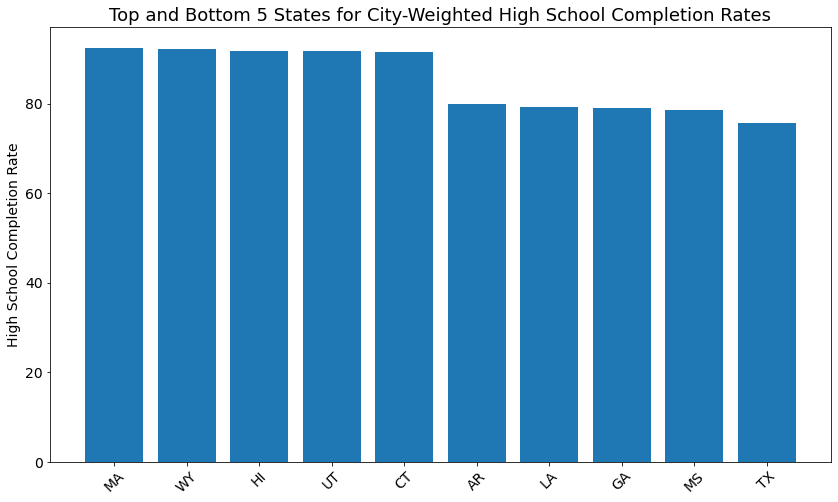

In [619]:
plt.figure(figsize=(14,8))
plt.title('Top and Bottom 5 States for City-Weighted High School Completion Rates', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('High School Completion Rate', fontsize=14)

plt.bar(df_pct_completed_hs_state['percent_completed_hs'].index, df_pct_completed_hs_state['percent_completed_hs'].values)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.

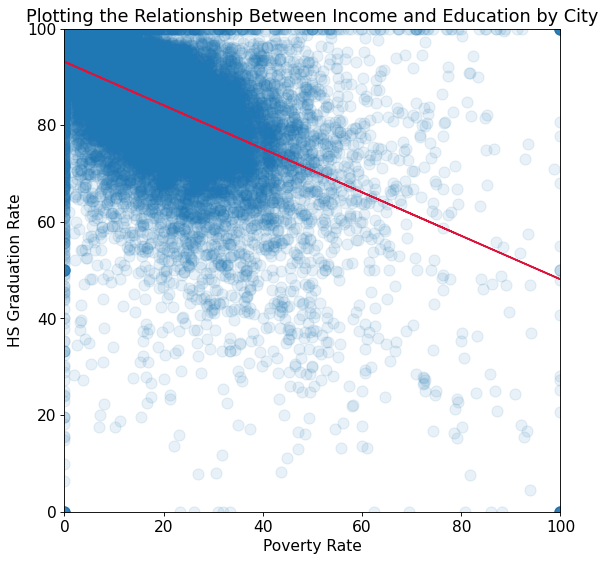

In [620]:
# Merge datasets
df_poverty_hs = df_pct_poverty.merge(df_pct_completed_hs, how='inner', on=['City', 'Geographic Area'])
df_poverty_hs = df_poverty_hs.dropna()

# Plot relationship
plt.figure(figsize=(8,8), dpi=80)
plt.title('Plotting the Relationship Between Income and Education by City', fontsize=16)

plt.xlabel('Poverty Rate', fontsize=14)
plt.ylabel('HS Graduation Rate', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Scatter plot!
plt.scatter(x=df_poverty_hs['poverty_rate'], y=df_poverty_hs['percent_completed_hs'], alpha=0.1, s=100)

# Add line of best fit
reg = np.polyfit(df_poverty_hs['poverty_rate'], df_poverty_hs['percent_completed_hs'], 1)
b1, b0 = reg[0], reg[1]
pred_y = b0 + b1*df_poverty_hs['poverty_rate']
plt.plot(df_poverty_hs['poverty_rate'], pred_y, c='crimson')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

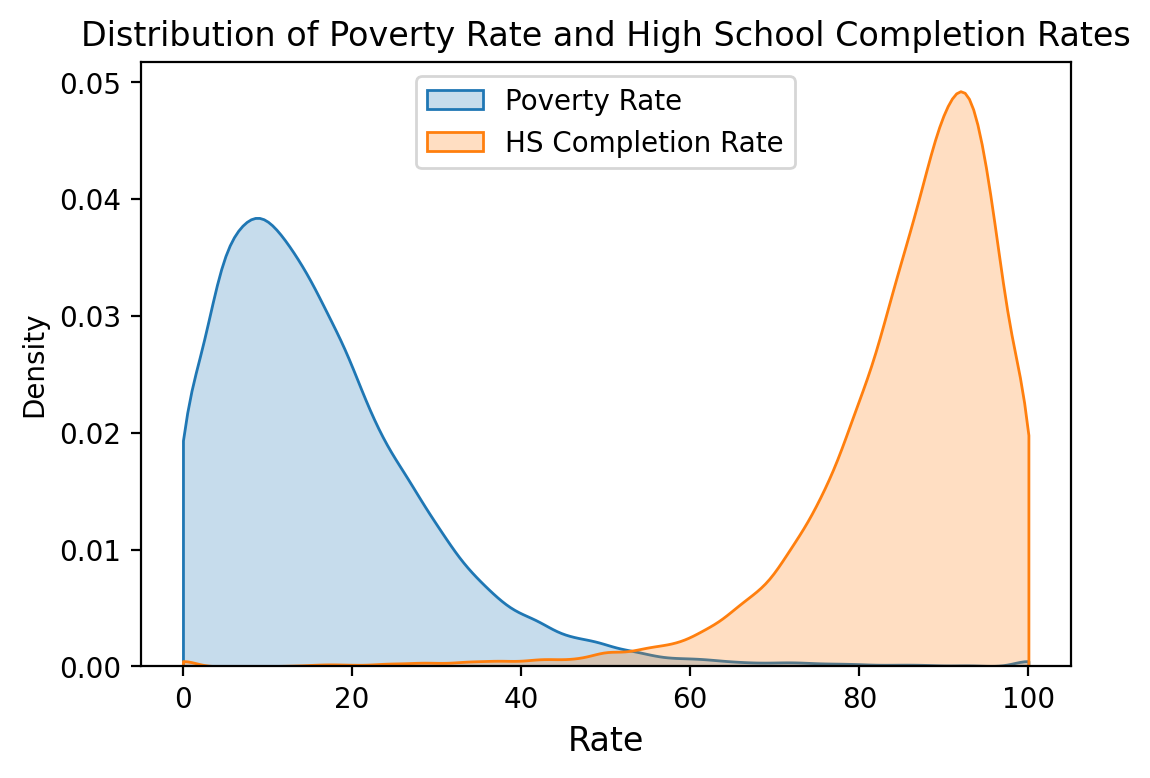

In [621]:
plt.figure(dpi=200)
sns.kdeplot(df_poverty_hs['poverty_rate'], shade=True, clip=(0,100), label='Poverty Rate')
sns.kdeplot(df_poverty_hs['percent_completed_hs'], shade=True, clip=(0,100), label='HS Completion Rate')
plt.title('Distribution of Poverty Rate and High School Completion Rates')
plt.xlabel('Rate', fontsize=12)
plt.legend(loc='upper center')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [622]:
# See above

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [623]:
# Loop through to cast as float or drop if missing
racial_group_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

for col in racial_group_columns:
    city_list = []
    for city in df_share_race_city[col]:
        if city == '(X)':
            city = np.nan
        else:
            city = float(city)
        city_list.append(city)
    df_share_race_city[col] = city_list

df_share_race_city = df_share_race_city.dropna()
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [624]:
# Group by state
df_share_race_state = df_share_race_city.groupby('Geographic area').mean()
df_share_race_state = df_share_race_state.reset_index()
df_share_race_state = df_share_race_state.rename(columns={'Geographic area': 'state'})
df_share_race_state['total_share'] = df_share_race_state['share_white'] + df_share_race_state['share_black'] + df_share_race_state['share_native_american'] \
                                     + df_share_race_state['share_asian'] + df_share_race_state['share_hispanic']
df_share_race_state

,state,share_white,share_black,share_native_american,share_asian,share_hispanic,total_share
0,AK,45.65,0.57,45.86,1.39,2.15,95.62
1,AL,72.51,23.32,0.66,0.48,2.98,99.95
2,AR,78.45,16.30,0.76,0.48,4.27,100.26
3,AZ,59.93,0.95,28.59,0.73,20.14,110.34
4,CA,71.87,2.69,1.72,5.57,29.65,111.50
5,CO,87.77,0.92,1.62,1.15,17.90,109.36
6,CT,86.11,4.99,0.66,2.99,7.98,102.72
7,DC,38.50,50.70,0.30,3.50,9.10,102.10
8,DE,76.25,15.39,0.52,2.00,7.42,101.58
9,FL,78.67,13.37,0.46,1.62,16.53,110.64


In [625]:
def add_element_wise(*lists_of_same_length):
    """
    Add lists together element-wise. E.g., ([1,2], [3,4]) becomes [4,6]
    :param lists_of_same_length: n-many lists of the same length of numbers
    :return: A summed list of the same length as the inputs
    """
    list_length = len(lists_of_same_length[0])
    summed_list = []
    for idx in range(list_length):
        summer = 0
        for list in lists_of_same_length:
            summer += list[idx]
        summed_list.append(summer)
    return summed_list

add_element_wise([1,2], [3,4])

[4, 6]

In [626]:
# Set variables for simplicity
labels = df_share_race_state['state']
white = df_share_race_state['share_white']
black = df_share_race_state['share_black']
native_american = df_share_race_state['share_native_american']
asian = df_share_race_state['share_asian']
hispanic = df_share_race_state['share_hispanic']

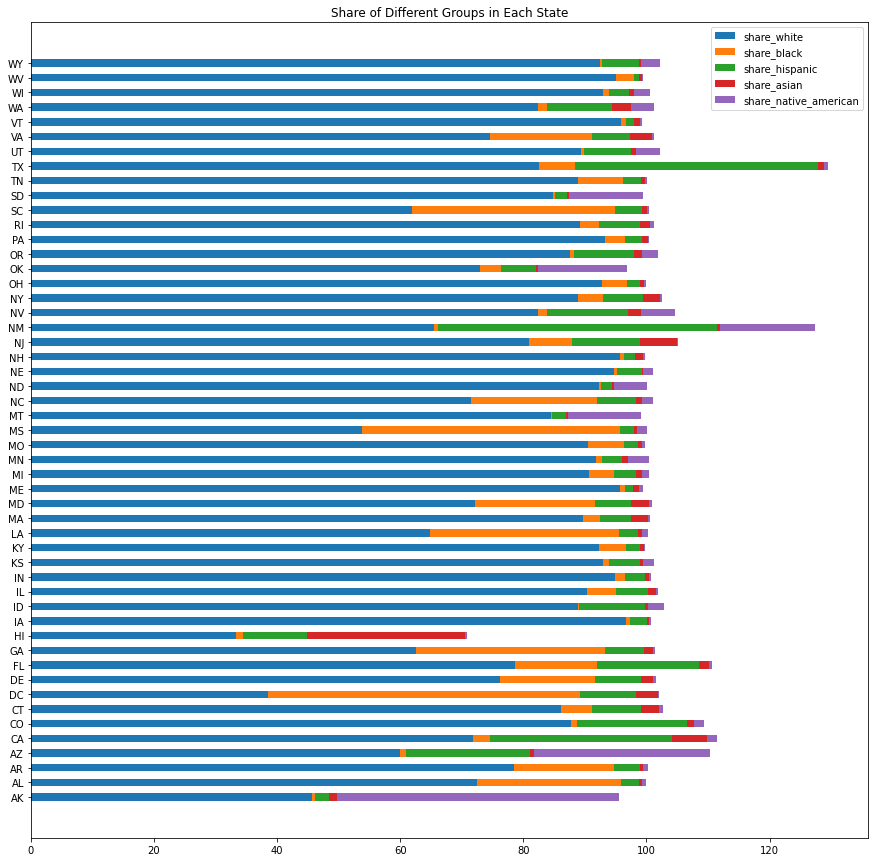

In [627]:
"""
Note: the previously mentioned issue persists from average cities by state without adjusting for population differences. E.g., according to US Census, California has a population 6% African American and 16% Asian, which is orders of magnitude off from these values. https://www.census.gov/quickfacts/CA
"""
# Make a stacked bar chart
width = 0.5
fig, ax = plt.subplots(figsize=(15, 15))

# Add bars iteratively, with each one shifted from the left by the length of the previous state values
ax.barh(labels, white, width, label='share_white')
ax.barh(labels, black, width, label='share_black', left=white)
ax.barh(labels, hispanic, width, label='share_hispanic', left=add_element_wise(white, black))
ax.barh(labels, asian, width, label='share_asian', left=add_element_wise(white, black, hispanic))
ax.barh(labels, native_american, width, label='share_native_american', left=add_element_wise(white, black, hispanic, asian))

ax.set_title('Share of Different Groups in Each State')
ax.legend()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [628]:
race_dict = {'W': 'White',
             'B': 'Black',
             'H': 'Hispanic',
             'A': 'Asian',
             'N': 'Native American',
             'O': 'Other'}

df_race = df_fatalities.dropna(subset=['race'])
df_race['race'] = [race_dict[i] for i in df_race['race']]
df_race = df_race.value_counts('race')
df_race

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



race
White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Other                28
dtype: int64

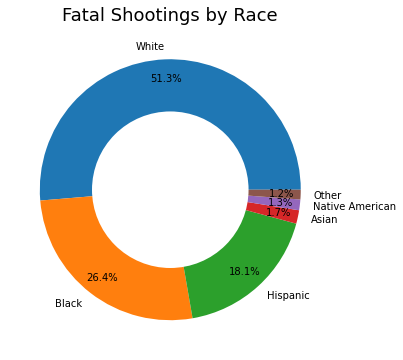

In [629]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(df_race.values, labels=df_race.index, autopct='%1.1f%%', pctdistance=0.85)

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Format and display chart
plt.title('Fatal Shootings by Race', fontsize=18)
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

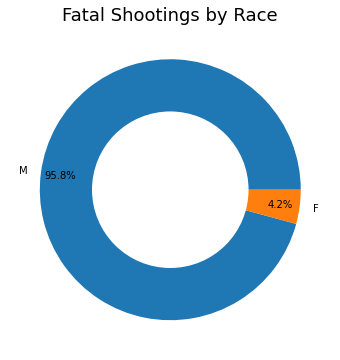

In [630]:
df_gender = df_fatalities.value_counts('gender')

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(df_gender.values, labels=df_gender.index, autopct='%1.1f%%', pctdistance=0.85)

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Format and display chart
plt.title('Fatal Shootings by Race', fontsize=18)
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [631]:
df_fatalities.value_counts(['manner_of_death', 'gender'])

manner_of_death   gender
shot              M         2261
shot and Tasered  M          167
shot              F          102
shot and Tasered  F            5
dtype: int64

In [632]:
# Remove missing values in columns of interest
df_dropped = df_fatalities.dropna(subset=['manner_of_death', 'gender', 'age'])

# Relabel manner of death by gender
df_male = df_dropped[df_dropped['gender']=='M']
male_dict = {'shot': 'shot (male)', 'shot and Tasered': 'shot and tasered (male)'}
df_male['manner_of_death'] = [male_dict[manner] for manner in df_male['manner_of_death']]

df_female = df_dropped[df_dropped['gender']=='F']
female_dict = {'shot': 'shot (female)', 'shot and Tasered': 'shot and tasered (female)'}
df_female['manner_of_death'] = [female_dict[manner] for manner in df_female['manner_of_death']]

df_total = df_dropped
total_dict = {'shot': 'shot (total)', 'shot and Tasered': 'shot and tasered (total)'}
df_total['manner_of_death'] = [total_dict[manner] for manner in df_total['manner_of_death']]

# Add them together
df_manner_by_gender = df_total.append(df_male).append(df_female)

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

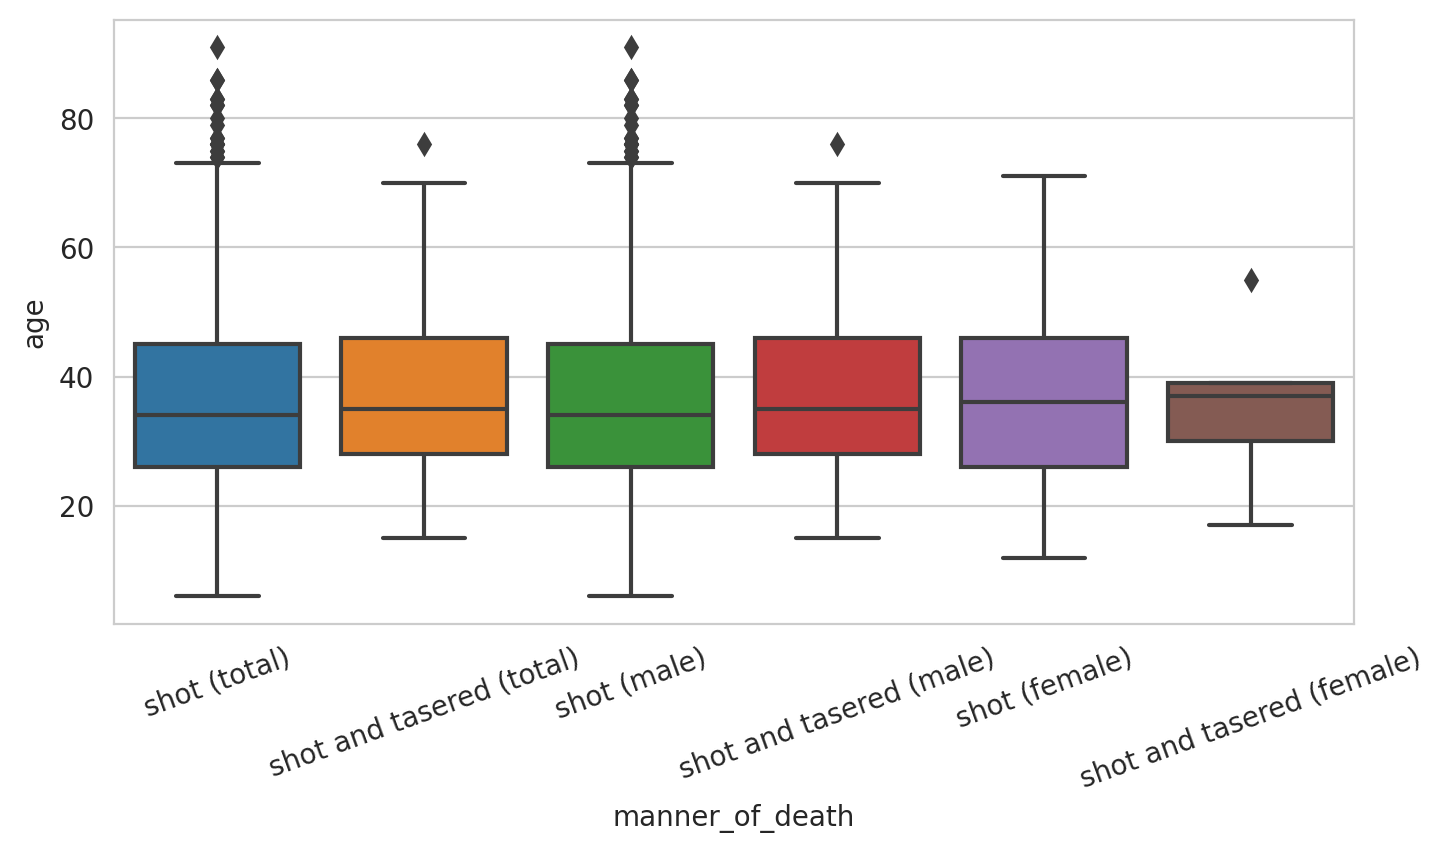

In [633]:
# Box plot of ages by manner of death and gender
"""
Note: It is hard to draw any kind of meaningful conclusion here with sparse data (i.e., there are only 5 females shot and tasered)
"""
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    ax = sns.boxplot(data=df_manner_by_gender,
                x='manner_of_death',
                y='age')

    # ax = sns.boxplot(x='categories', y='oxygen', hue='target', data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [634]:
df_armed = df_fatalities.value_counts('armed')
df_armed

armed
gun                1398
knife               373
vehicle             177
unarmed             171
undetermined        117
                   ... 
bayonet               1
hand torch            1
metal hand tool       1
machete and gun       1
bean-bag gun          1
Length: 68, dtype: int64

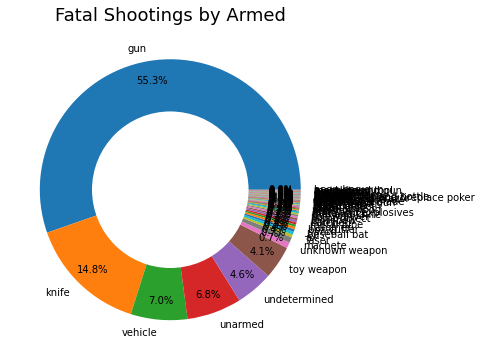

In [635]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(df_armed.values, labels=df_armed.index, autopct='%1.1f%%', pctdistance=0.85)

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Format and display chart
plt.title('Fatal Shootings by Armed', fontsize=18)
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.

In [636]:
df_age = df_fatalities.dropna(subset=['age', 'race'])
df_age['race'] = [race_dict[race] for race in df_age['race']]

len(df_age[df_age['age']<25])/len(df_age)

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.18736477715274774

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

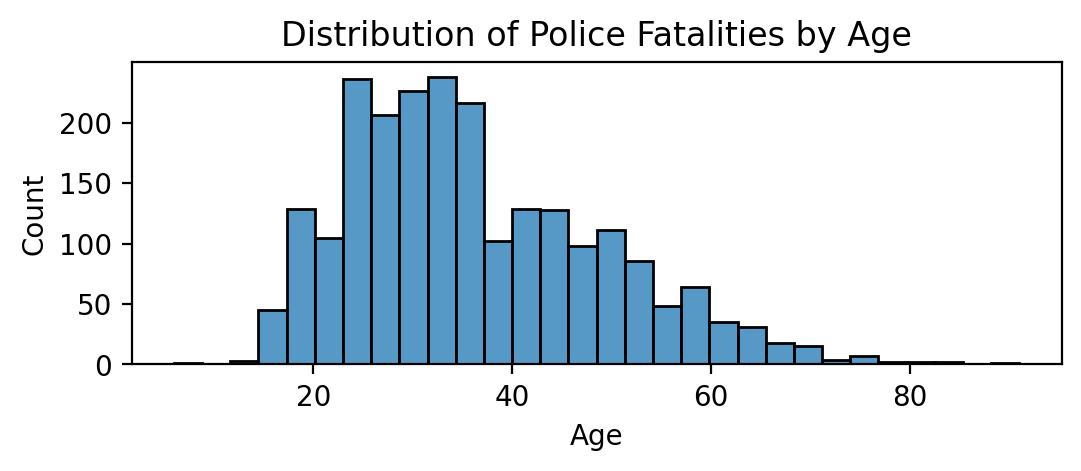

In [637]:
plt.figure(figsize=(6,2), dpi=200)
sns.histplot(data=df_age,
             x=df['age'],
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Police Fatalities by Age')
plt.show()

Text(0.5, 0, 'Age')

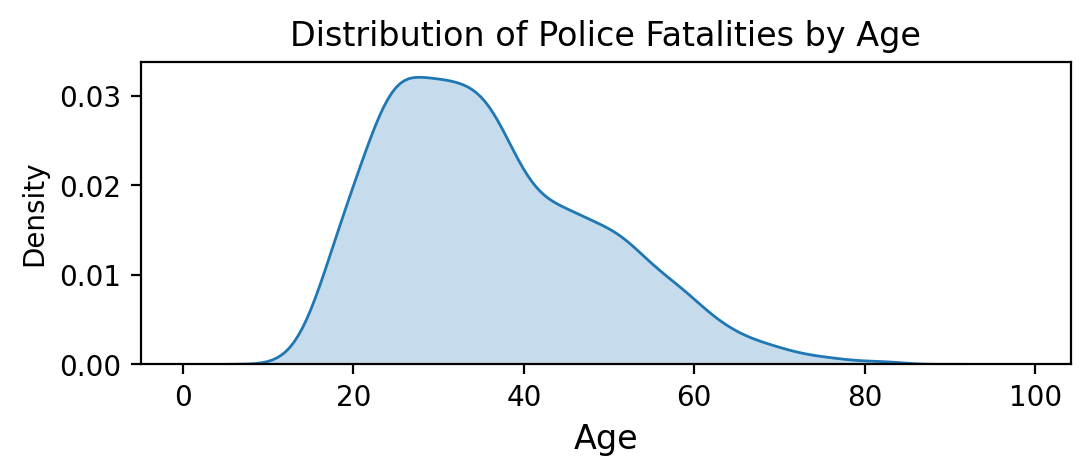

In [638]:
plt.figure(figsize=(6,2), dpi=200)
sns.kdeplot(df_age['age'], shade=True, clip=(0,100), label='Total')
plt.title('Distribution of Police Fatalities by Age')
plt.xlabel('Age', fontsize=12)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [639]:
df_age_white = df_age[df_age['race']=='White']['age']
df_age_black = df_age[df_age['race']=='Black']['age']
df_age_hispanic = df_age[df_age['race']=='Hispanic']['age']
df_age_asian = df_age[df_age['race']=='Asian']['age']
df_age_native_american = df_age[df_age['race']=='Native American']['age']

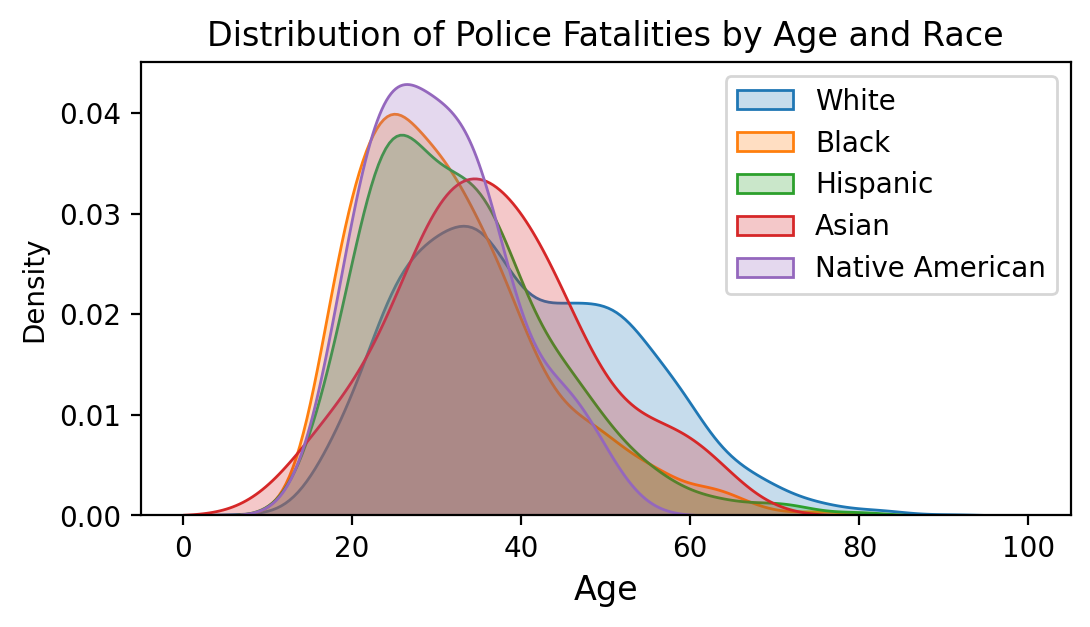

In [640]:
plt.figure(figsize=(6,3), dpi=200)
sns.kdeplot(df_age_white, shade=True, clip=(0,100), label='White')
sns.kdeplot(df_age_black, shade=True, clip=(0,100), label='Black')
sns.kdeplot(df_age_hispanic, shade=True, clip=(0,100), label='Hispanic')
sns.kdeplot(df_age_asian, shade=True, clip=(0,100), label='Asian')
sns.kdeplot(df_age_native_american, shade=True, clip=(0,100), label='Native American')
plt.title('Distribution of Police Fatalities by Age and Race')
plt.xlabel('Age', fontsize=12)
plt.legend(loc='upper right')

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [641]:
race_dict['A']

'Asian'

In [642]:
df_race = df_fatalities.dropna(subset=['race'])
df_race['race'] = [race_dict[race] for race in df_race['race']]
df_race = df_race.value_counts('race')
df_race

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



race
White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Other                28
dtype: int64

<BarContainer object of 6 artists>

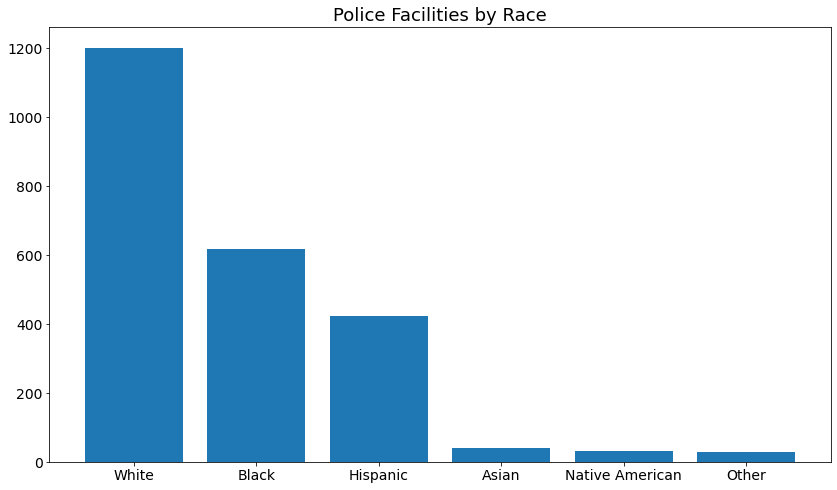

In [643]:
plt.figure(figsize=(14,8))
plt.title('Police Facilities by Race', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar(df_race.index, df_race.values)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

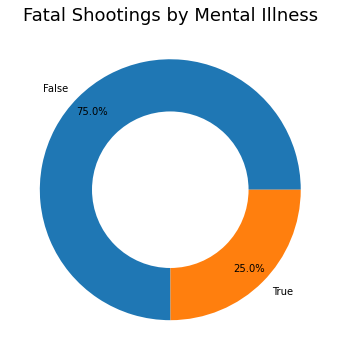

In [644]:
df_mental = df_fatalities.value_counts('signs_of_mental_illness')

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(df_mental.values, labels=df_mental.index, autopct='%1.1f%%', pctdistance=0.85)

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Format and display chart
plt.title('Fatal Shootings by Mental Illness', fontsize=18)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [645]:
df['city_state'] = df['city'] + ', ' +  df['state']
df_top10_cities_count = df.value_counts('city_state')[0:10]
df_top10_cities_count

city_state
Los Angeles, CA    36
Phoenix, AZ        28
Houston, TX        24
Chicago, IL        22
Las Vegas, NV      17
Austin, TX         16
San Antonio, TX    16
Columbus, OH       15
St. Louis, MO      14
Miami, FL          14
dtype: int64

<BarContainer object of 10 artists>

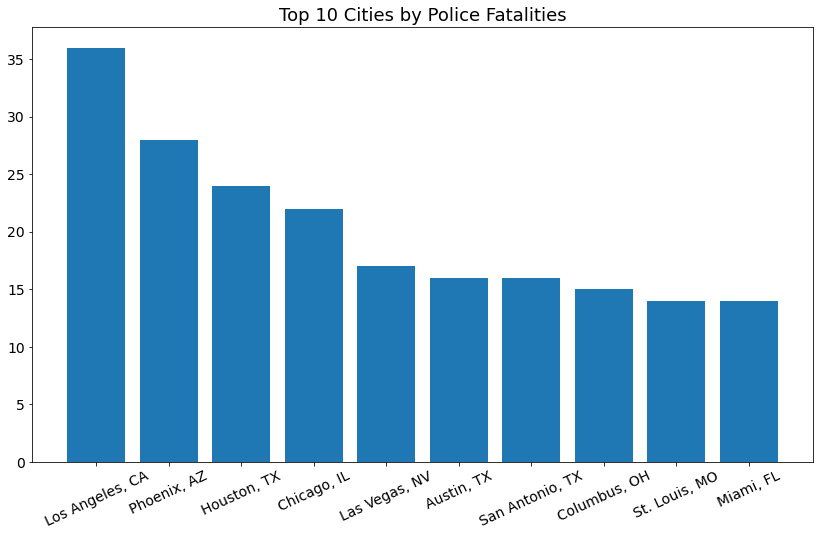

In [646]:
plt.figure(figsize=(14,8))
plt.title('Top 10 Cities by Police Fatalities', fontsize=18)

plt.xticks(fontsize=14, rotation=25)
plt.yticks(fontsize=14)

plt.bar(df_top10_cities_count.index, df_top10_cities_count.values)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [647]:
# Return fatalities that occur in a top 10 city
df_top10_cities = df[df['city_state'].isin(df_top10_cities_count.index)]
df_top10_cities_by_race = df_top10_cities.groupby(['city_state', 'race']).count()
df_top10_cities_by_race = df_top10_cities_by_race[['name']].rename(columns={'name': 'deaths'})

# Group deaths by race
df_top10_cities_by_race = df_top10_cities_by_race.unstack(level=-1)
df_top10_cities_by_race = df_top10_cities_by_race.fillna(0)
df_top10_cities_by_race = df_top10_cities_by_race.reset_index(col_level=1)
cols = df_top10_cities_by_race.columns.droplevel()
df_top10_cities_by_race = pd.DataFrame(columns=cols, data=df_top10_cities_by_race.values)
df_top10_cities_by_race = df_top10_cities_by_race.set_index('city_state')

# Calculate percentages
df_top10_cities_by_race['Total'] = df_top10_cities_by_race['W'] + df_top10_cities_by_race['B'] + df_top10_cities_by_race['H'] + \
                                   df_top10_cities_by_race['A'] + df_top10_cities_by_race['N']
df_top10_cities_by_race['fatal_white'] = 100*df_top10_cities_by_race['W']/df_top10_cities_by_race['Total']
df_top10_cities_by_race['fatal_black'] = 100*df_top10_cities_by_race['B']/df_top10_cities_by_race['Total']
df_top10_cities_by_race['fatal_hispanic'] = 100*df_top10_cities_by_race['H']/df_top10_cities_by_race['Total']
df_top10_cities_by_race['fatal_asian'] = 100*df_top10_cities_by_race['A']/df_top10_cities_by_race['Total']
df_top10_cities_by_race['fatal_native_american'] = 100*df_top10_cities_by_race['N']/df_top10_cities_by_race['Total']

# Select relevant columns
fatal_columns = ['fatal_white', 'fatal_black', 'fatal_hispanic', 'fatal_asian', 'fatal_native_american']
df_top10_cities_by_race = df_top10_cities_by_race[fatal_columns]

share_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_race_by_city = df.set_index('city_state')
df_race_by_city = df_race_by_city[share_columns]

# Combine with share of race by city
df_top10_cities_by_race = df_top10_cities_by_race.merge(df_race_by_city, how='left', left_index=True, right_index=True)
df_top10_cities_by_race = df_top10_cities_by_race.drop_duplicates()
df_top10_cities_by_race

,fatal_white,fatal_black,fatal_hispanic,fatal_asian,fatal_native_american,share_white,share_black,share_native_american,share_asian,share_hispanic
city_state,,,,,,,,,,
"Austin, TX",68.75,18.75,12.50,0.00,0.00,68.30,8.10,0.90,6.30,35.10
"Chicago, IL",9.09,86.36,4.55,0.00,0.00,45.00,32.90,0.50,5.50,28.90
"Columbus, OH",35.71,64.29,0.00,0.00,0.00,61.50,28.00,0.30,4.10,5.60
"Houston, TX",12.50,58.33,25.00,4.17,0.00,50.50,23.70,0.70,6.00,43.80
"Las Vegas, NV",52.94,17.65,29.41,0.00,0.00,62.10,11.10,0.70,6.10,31.50
"Los Angeles, CA",16.67,27.78,52.78,2.78,0.00,49.80,9.60,0.70,11.30,48.50
"Miami, FL",7.14,50.00,42.86,0.00,0.00,72.60,19.20,0.30,1.00,70.00
"Phoenix, AZ",42.86,7.14,39.29,0.00,10.71,65.90,6.50,2.20,3.20,40.80
"San Antonio, TX",18.75,12.50,68.75,0.00,0.00,72.60,6.90,0.90,2.40,63.20


In [648]:
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,body_camera,poverty_rate,median_income,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs,city_state
0,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,...,False,28.60,"37,072.00",78.90,0.80,3.70,1.10,19.20,80.10,"Shelton, WA"
1,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,...,False,14.90,"65,765.00",70.90,2.60,1.00,8.90,21.10,88.10,"Aloha, OR"
2,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,...,False,17.30,"45,947.00",71.90,11.50,1.20,4.80,15.30,87.50,"Wichita, KS"
3,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,...,False,13.20,"81,294.00",48.50,6.10,0.50,33.30,15.10,87.00,"San Francisco, CA"
4,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,...,False,16.60,"47,791.00",76.50,0.90,1.20,0.90,43.10,76.30,"Evans, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,...,False,35.50,"27,683.00",51.70,42.90,0.30,0.90,3.00,82.10,"Dayton, OH"
2532,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,...,False,40.00,"27,050.00",33.00,64.30,0.10,0.80,1.40,79.00,"Homer, LA"
2535,Alejandro Alvarado,27/07/17,shot,knife,34.00,M,H,Chowchilla,CA,False,...,False,32.10,"34,559.00",61.60,12.60,2.00,2.10,37.80,68.30,"Chowchilla, CA"
2540,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,...,True,17.90,"42,650.00",90.50,3.10,0.80,3.20,2.70,89.30,"Oshkosh, WI"


In [649]:
# Set variables for simplicity
labels = df_top10_cities_by_race.index

share_white = df_top10_cities_by_race['share_white']
share_black = df_top10_cities_by_race['share_black']
share_native_american = df_top10_cities_by_race['share_native_american']
share_asian = df_top10_cities_by_race['share_asian']
share_hispanic = df_top10_cities_by_race['share_hispanic']

fatal_white = df_top10_cities_by_race['fatal_white']
fatal_black = df_top10_cities_by_race['fatal_black']
fatal_native_american = df_top10_cities_by_race['fatal_native_american']
fatal_asian = df_top10_cities_by_race['fatal_asian']
fatal_hispanic = df_top10_cities_by_race['fatal_hispanic']

In [650]:
def show_races_by_city():
    # Make a stacked bar chart
    width = 0.5
    fig, ax = plt.subplots(figsize=(16, 6))

    # Add bars iteratively, with each one shifted from the left by the length of the previous state values
    ax.barh(labels, share_white, width, label='share_white')
    ax.barh(labels, share_black, width, label='share_black', left=share_white)
    ax.barh(labels, share_hispanic, width, label='share_hispanic', left=add_element_wise(share_white, share_black))
    ax.barh(labels, share_asian, width, label='share_asian', left=add_element_wise(share_white, share_black, share_hispanic))
    ax.barh(labels, share_native_american, width, label='share_native_american', left=add_element_wise(share_white, share_black, share_hispanic, share_asian))

    ax.set_title('Share of Different Races by City (does not sum to 100 due to multi-racial residents)')
    ax.legend()
    plt.show()

In [651]:
def show_fatalities_by_city():
    # Make a stacked bar chart
    width = 0.5
    fig, ax = plt.subplots(figsize=(16, 6))

    # Add bars iteratively, with each one shifted from the left by the length of the previous state values
    ax.barh(labels, fatal_white, width, label='fatal_white')
    ax.barh(labels, fatal_black, width, label='fatal_black', left=fatal_white)
    ax.barh(labels, fatal_hispanic, width, label='fatal_hispanic', left=add_element_wise(fatal_white, fatal_black))
    ax.barh(labels, fatal_asian, width, label='fatal_asian', left=add_element_wise(fatal_white, fatal_black, fatal_hispanic))
    ax.barh(labels, fatal_native_american, width, label='fatal_native_american', left=add_element_wise(fatal_white, fatal_black, fatal_hispanic, fatal_asian))

    ax.set_title('Share of Fatalities by Race and City')
    ax.legend()
    plt.xlim([0,170])
    plt.show()

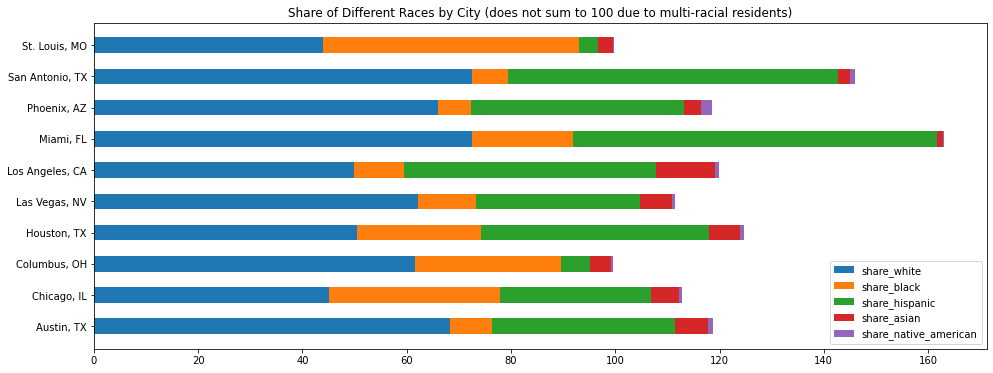

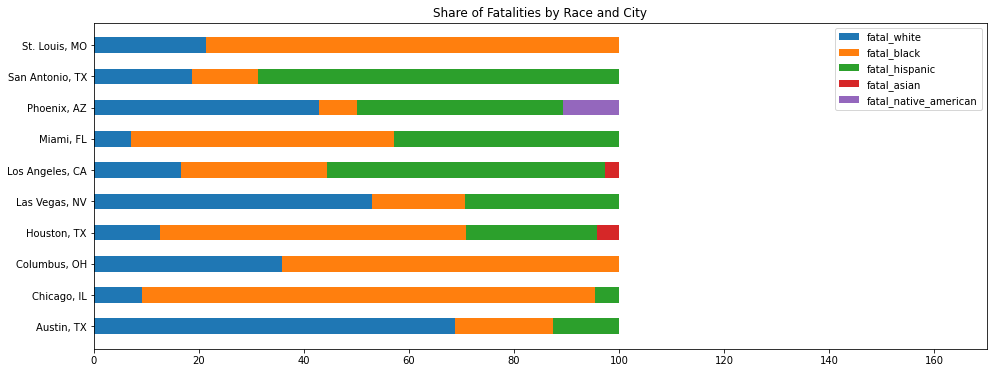

In [652]:
show_races_by_city()
show_fatalities_by_city()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [653]:
df_state.values

array([424, 225, 154, 118,  79,  78,  74,  70,  69,  64,  62,  62,  59,
        57,  51,  51,  50,  47,  45,  44,  43,  43,  43,  42,  38,  38,
        37,  35,  32,  27,  26,  24,  23,  23,  22,  17,  15,  15,  13,
        12,  11,  11,  11,  10,   9,   8,   8,   7,   4,   3,   2])

In [654]:
# Map fatalities by state
df_state = df_fatalities.value_counts('state')

fig = px.choropleth(df_state,
                    locations=df_state.index,
                    locationmode='USA-states',
                    color=df_state.values,
                    color_continuous_scale=px.colors.sequential.matter,
                    scope='usa'
                    )
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [655]:
from datetime import datetime
df_fatalities['datetime'] = [datetime.strptime(day, '%d/%m/%y').date() for day in df_fatalities['date']]
df_fatalities = df_fatalities.sort_values(by='datetime')
df_fatalities['month'] = [a_datetime.strftime('%b %Y') for a_datetime in df_fatalities['datetime']]

df_month = df_fatalities.value_counts('month').reset_index()
df_month['monthtime'] = [datetime.strptime(month, '%b %Y') for month in df_month['month']]
df_month = df_month.sort_values(by='monthtime')
df_month = df_month.drop(columns=['monthtime'])
df_month = df_month.set_index('month')

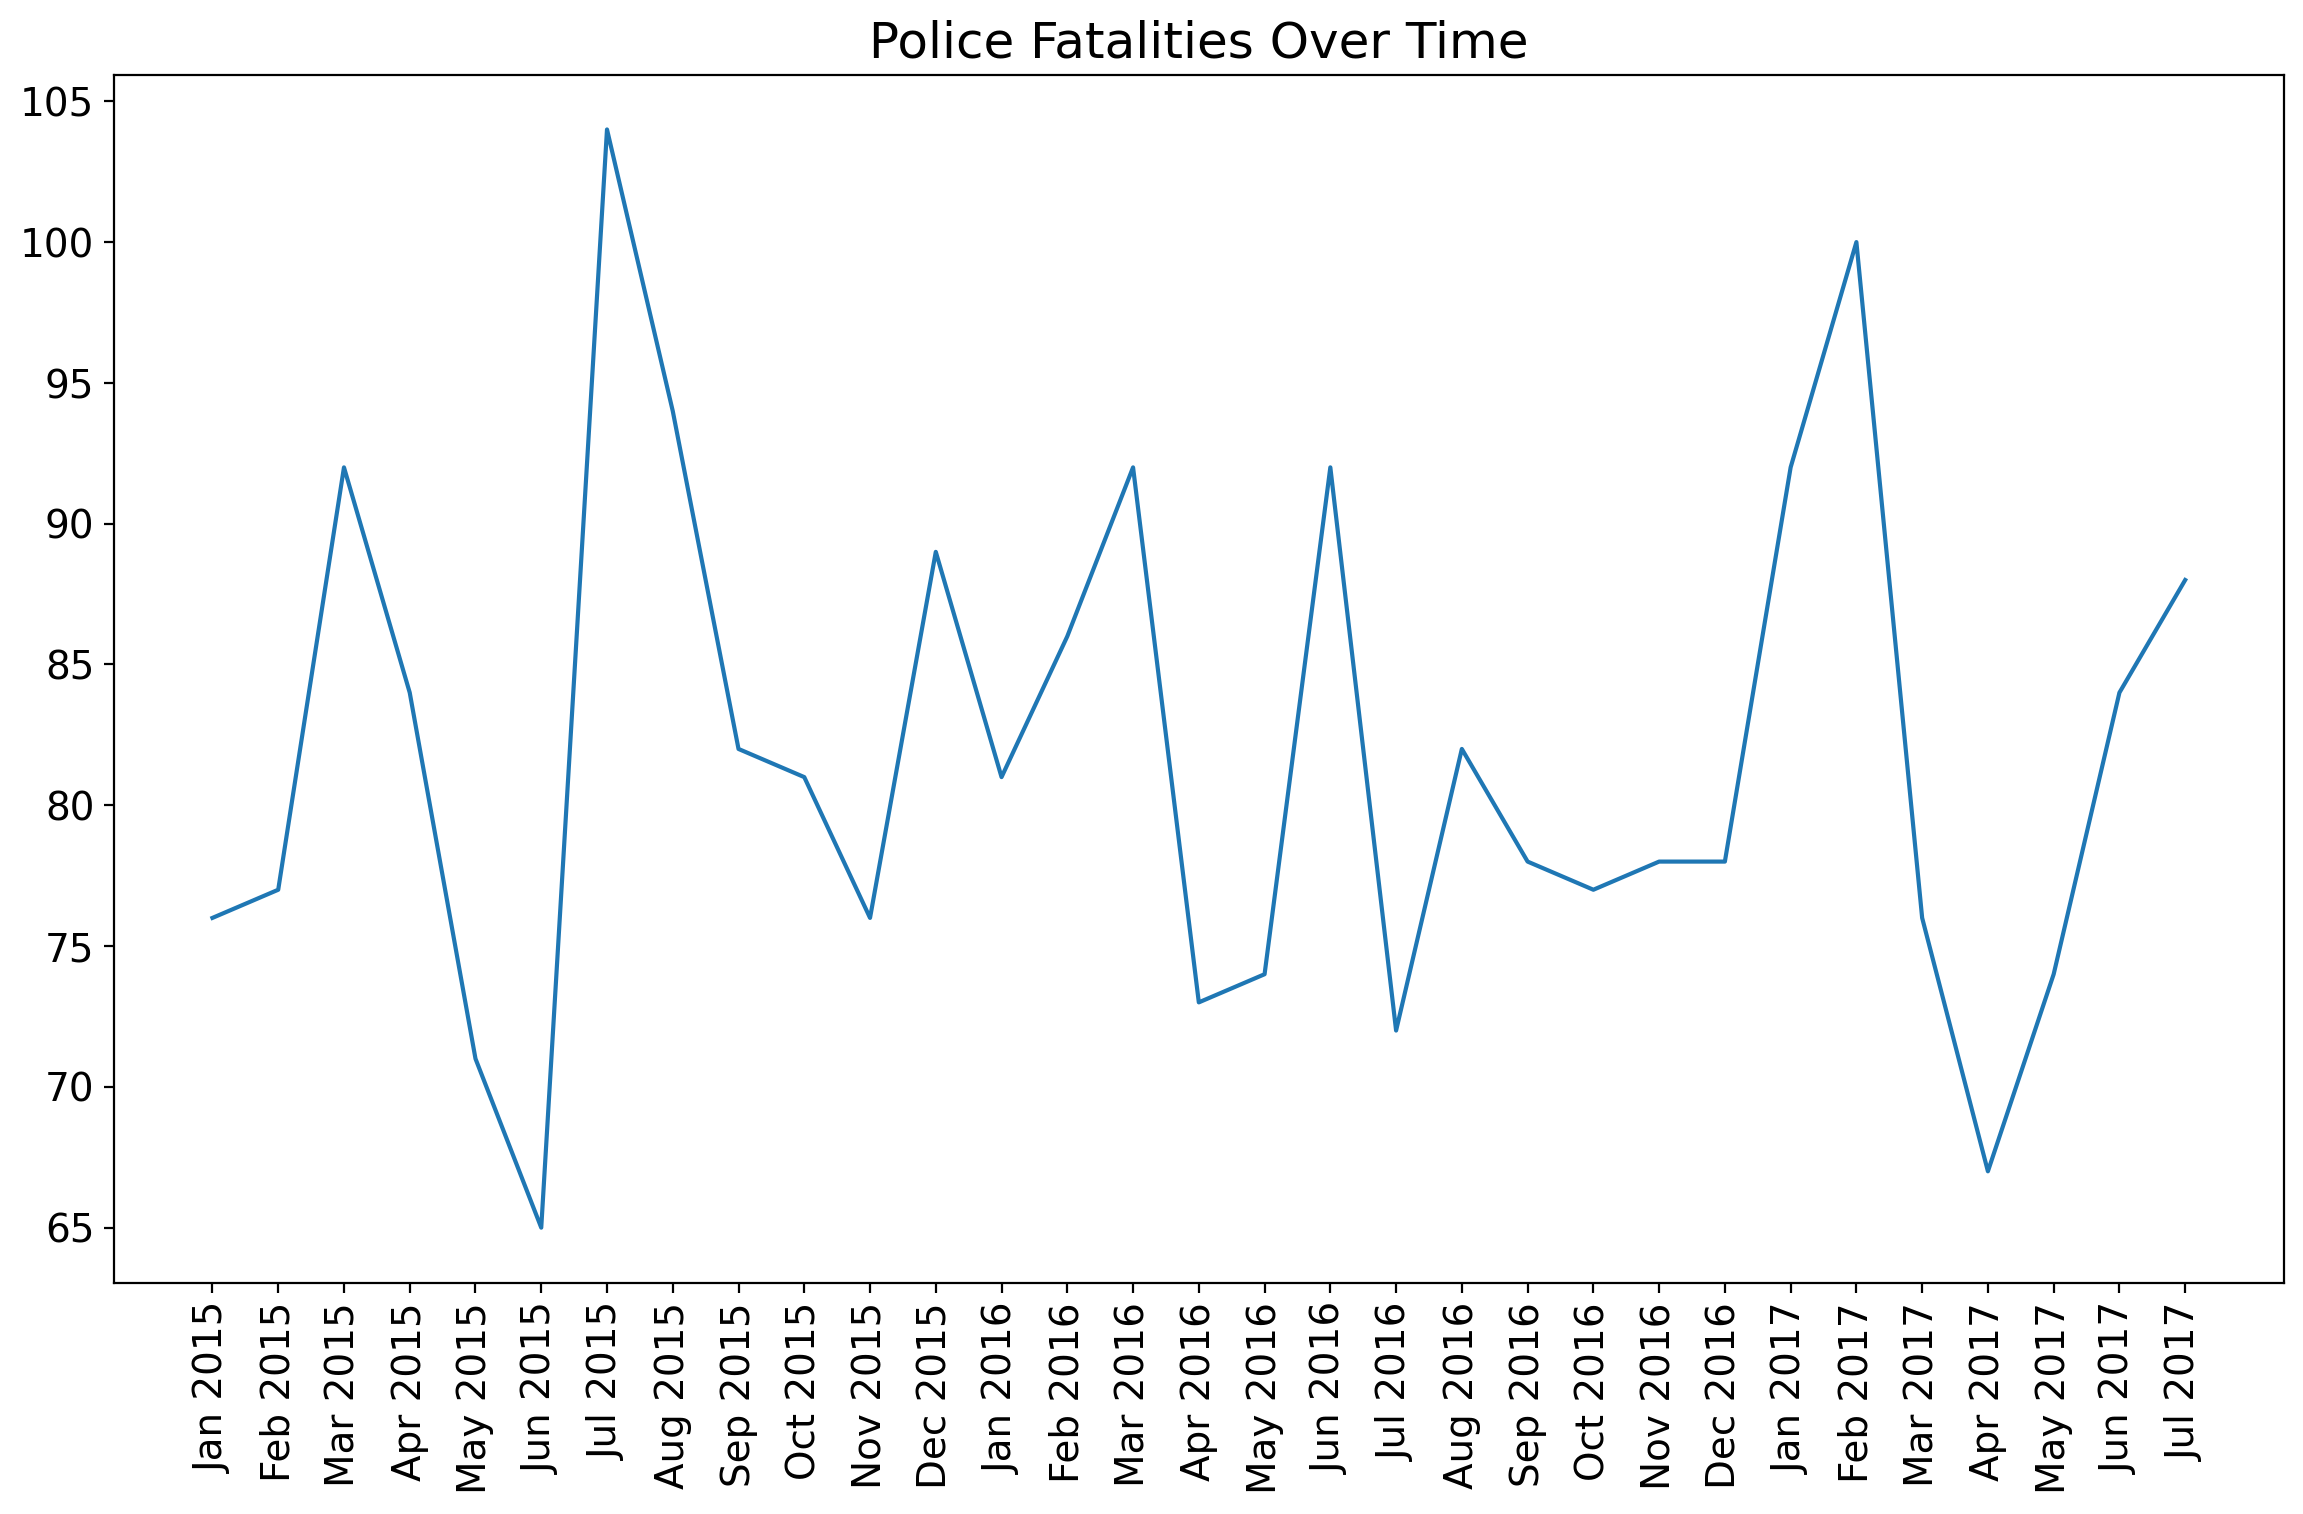

In [656]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Police Fatalities Over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

bw_line = plt.plot(df_month.index, df_month.values)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).